<a href="https://colab.research.google.com/github/IsraelVelez/Redes-neuronales-artificiales/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [29]:
# Importamos los datos de csv en un dataframe de pandas
data = pd.read_csv("/content/usuarios-twitter.csv", sep = ",",encoding='latin-1')
# Columnas del dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [30]:
data

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


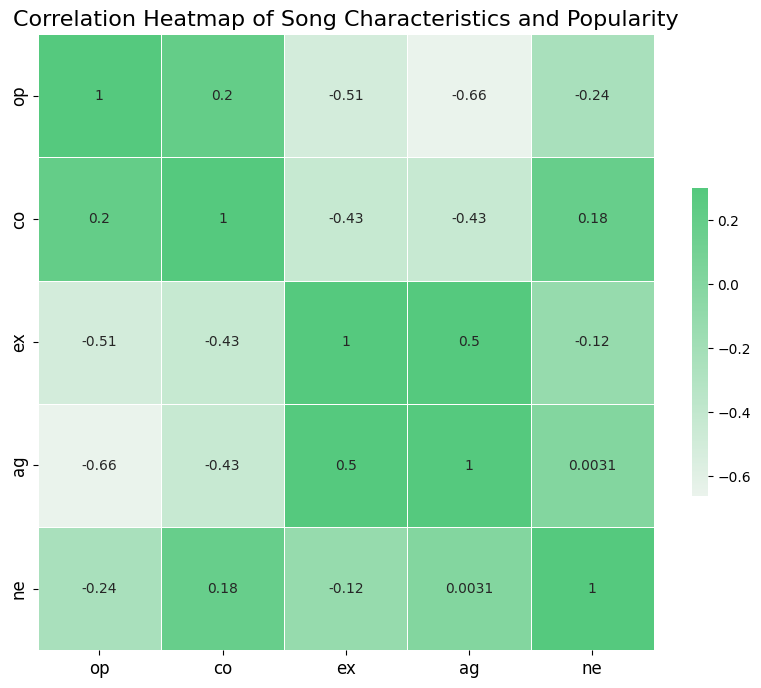

In [31]:
# The stream data of "Love Grows" is corrupt

# Correlation matrix
corr_matrix = data[['op', 'co', 'ex', 'ag','ne']].corr()

# Create a custom color palette with potify green
cmap = sns.light_palette("#1DB954", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Titles and labels
plt.title('Correlation Heatmap of Song Characteristics and Popularity', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

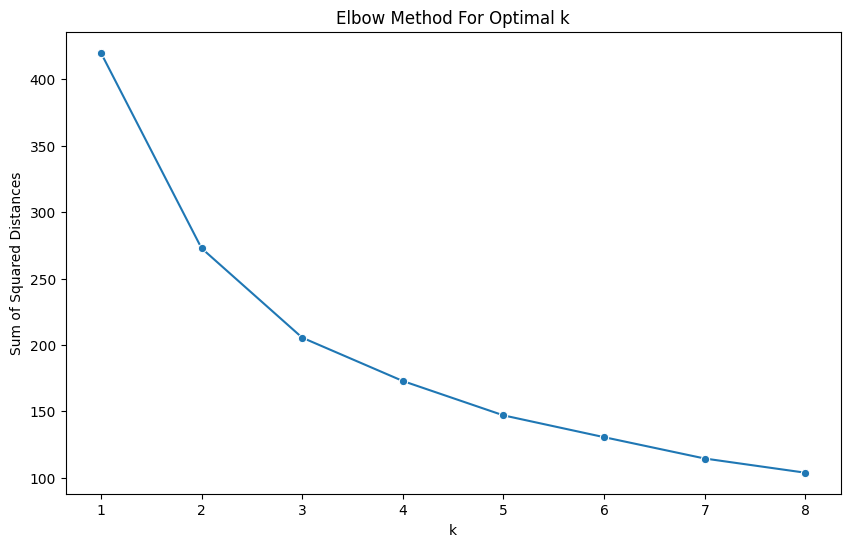

In [43]:
# Features to use for clustering
features = ['ne','ex','ag']

# Scaling the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

sse = []
possible_k_values = range(1, 9)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=6, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.show()

Elegimos como entrada las 3 variables: ne, ex, ag que son las que tienen valores más pequeños en su correlación

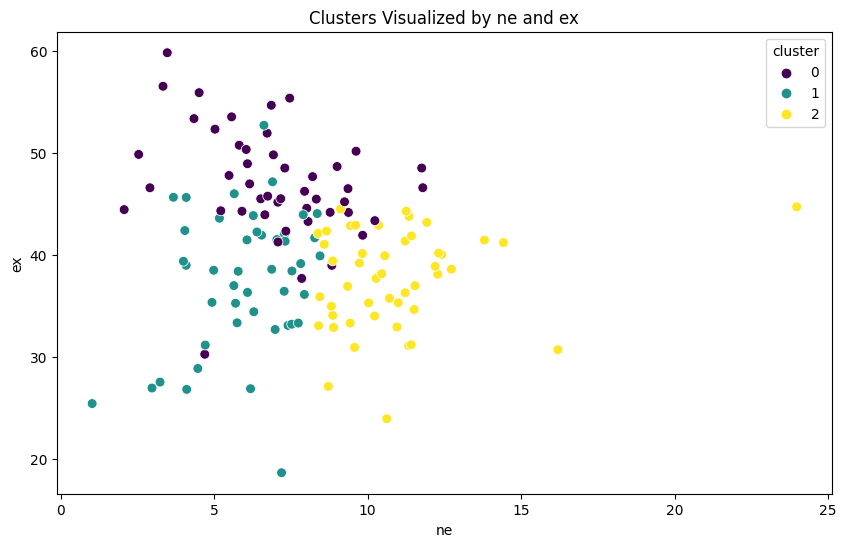

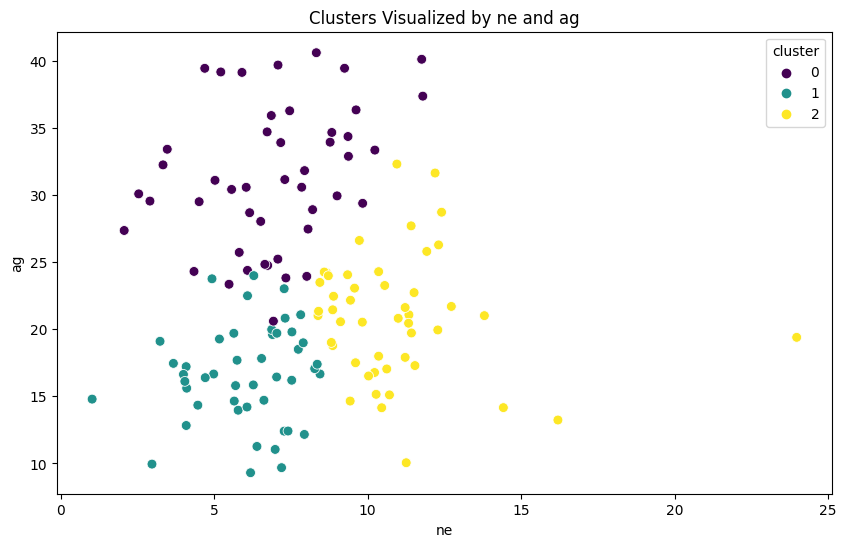

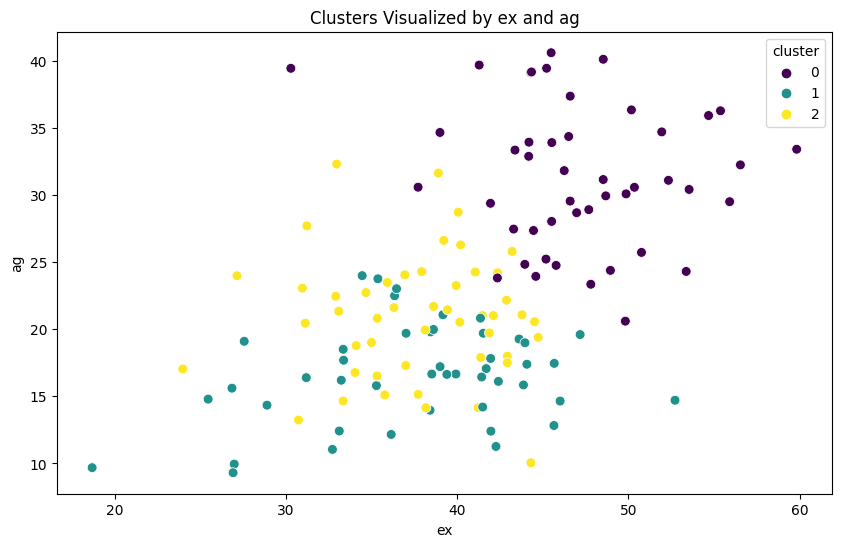

In [45]:

# Apply K-Means with the optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Analyzing the clusters
cluster_summary = data.groupby('cluster')[features].mean()

# Visualizing the clusters
# For example, let's plot 'ne' vs 'ex', colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ne'], y=data['ex'], hue=data['cluster'], palette='viridis', s=50)
plt.title('Clusters Visualized by ne and ex')
plt.show()

# For example, let's plot ''ne' vs 'ag'', colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ne'], y=data['ag'], hue=data['cluster'], palette='viridis', s=50)
plt.title('Clusters Visualized by ne and ag')

# For example, let's plot 'ex', 'ag', colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ex'], y=data['ag'], hue=data['cluster'], palette='viridis', s=50)
plt.title('Clusters Visualized by ex and ag')



plt.show()

#Análisis-Resultados
Según lo observado probamos con 2 y 3 clústers porque el codo mostraba puntos de inflexión en ambos k, sinembargo cuando vimos el comportamiento de los k means dividido por cada variable se puede apreciar que con tres clústers podemos ver las agrupaciones claras, mientras que con 2 clusters habían datos mezclados y muy separados de sus clases. El mejor modelo es de 3 clústers


Los grupos que se formaron se dividen en un nivel bajo y alto para cada categoría, formando así tres combinaciones distintas entre esos niveles:
Primera gráfica:          Extroversion    vs neuroticismo
                Cluster 0:Mucha extroversión y poco neuroticismo
                Cluster 1:Poco  extroversión y poco neuroticismo
                Cluster 2:Poco  extroversión y mucho neuroticismo
Segunda gráfica:          Neuroticismo   vs Amabilidad
                Cluster 0:Mucha  Amabilidad
                Cluster 1:Poco   Amabilidad y poco neuroticismo
                Cluster 2:Poco   Amabilidad y mucho neuroticismo
Tercera gráfica:          Extroversión   vs  Amabilidad
                Cluster 0:Mucha  Amabilidad y mucha extroversión
                Cluster 1:Poco   Poca Amabilidad
                Cluster 2:Poco   poca Amabilidad y poca extroversión
